# Module 15 - Gradient Descent
**Author** - Jacob Buysse

* This notebook will explore the math behind Gradient Descent with the application of Linear Regression.
* We will be training a model to predict the house price given some spatial features of the house.
* We will compare several learning rates
* We will compare the performance of our algorithm to the public libraries.

In this notebook we will be using the following libraries:

In [238]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Let us configure our graphs for font size, high DPI, and automatic layout.

In [2]:
matplotlib.rc('axes', labelsize=16)
matplotlib.rc('figure', dpi=150, autolayout=True)

## Dataset

We were sent a csv containing 100 samples with house price predictions.
* There are 100 samples.
* There are 3 features (f1, f2, f3) - all numeric.
    * NOTE: The features are not scaled.
* There is a price (the value to predict).

In [222]:
df = pd.read_csv(
    './multi_feature_dataset_100_samples.csv',
    header=None,
    delimiter=',',
    names=['f1', 'f2', 'f3', 'price']
)
df['bias'] = 1
df

,f1,f2,f3,price,bias
0,1444,5,18,477070.0,1
1,2742,5,1,811520.0,1
2,1413,1,9,317930.0,1
3,2838,1,4,634030.0,1
4,1977,3,14,511670.0,1
...,...,...,...,...,...
95,1893,4,42,482750.0,1
96,2601,4,7,653950.0,1
97,1040,2,19,319150.0,1
98,2145,2,46,437590.0,1


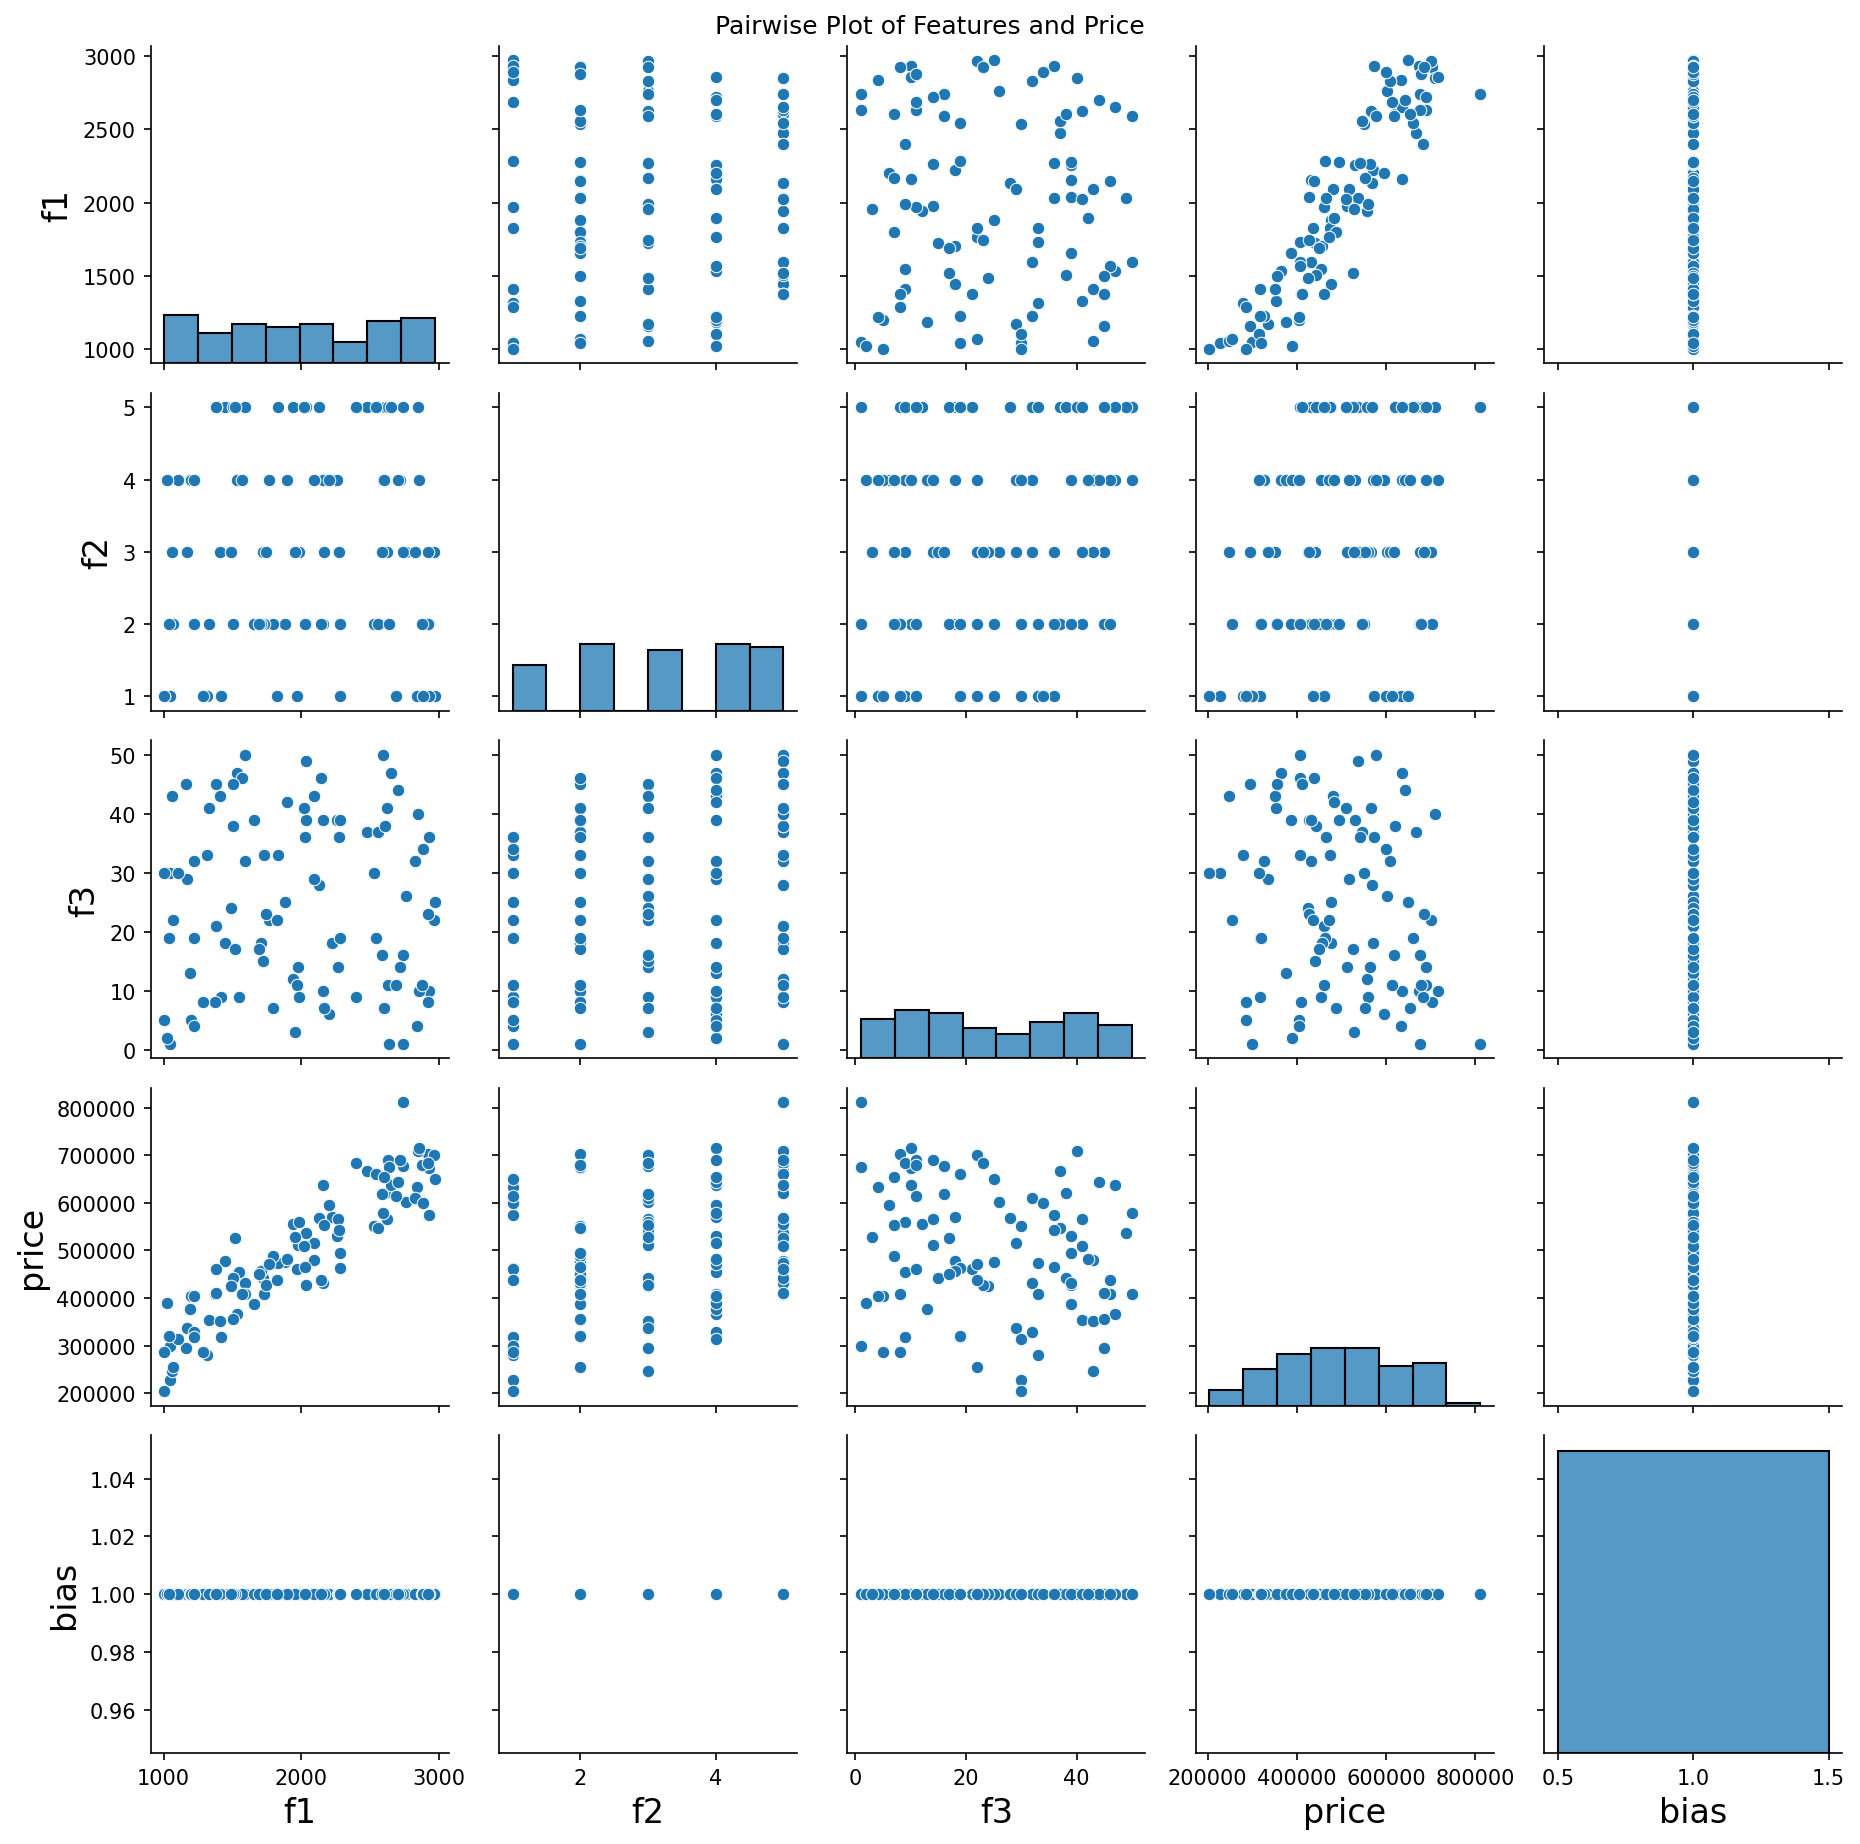

In [223]:
plot = sns.pairplot(df)
plot.fig.suptitle('Pairwise Plot of Features and Price')
plt.tight_layout()
plt.show()

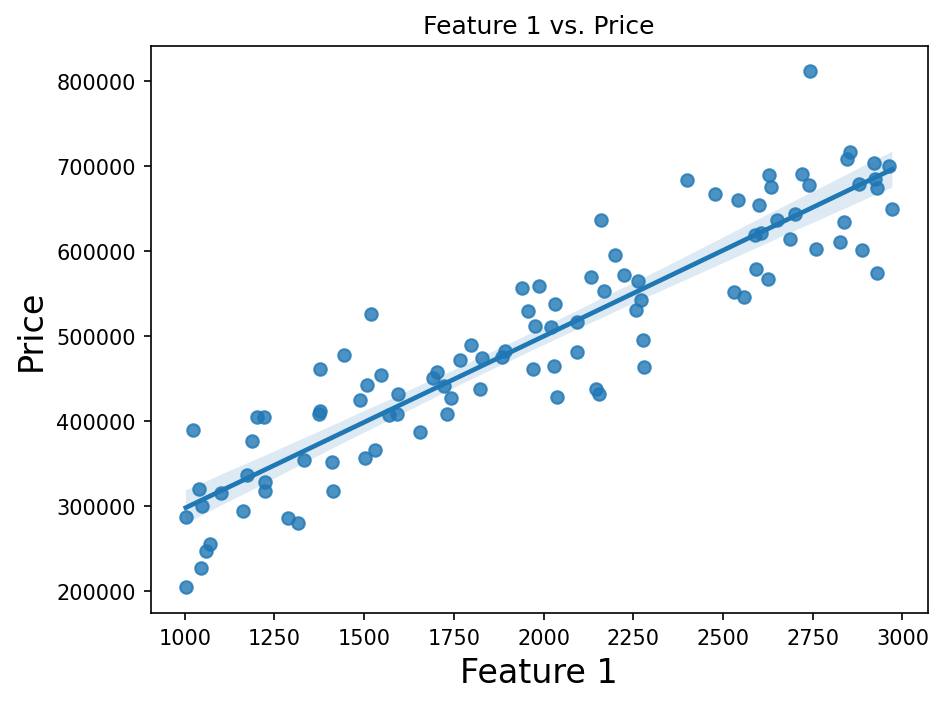

In [205]:
plot = sns.regplot(x=df.f1, y=df.price)
plot.set(title='Feature 1 vs. Price', xlabel='Feature 1', ylabel='Price')
plt.show()

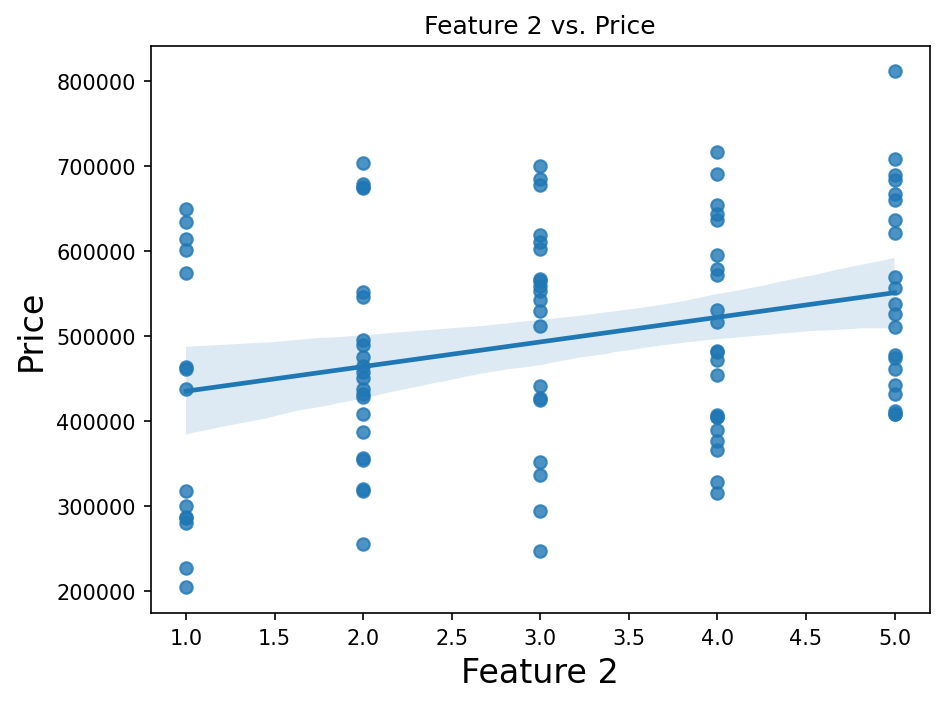

In [206]:
plot = sns.regplot(x=df.f2, y=df.price)
plot.set(title='Feature 2 vs. Price', xlabel='Feature 2', ylabel='Price')
plt.show()

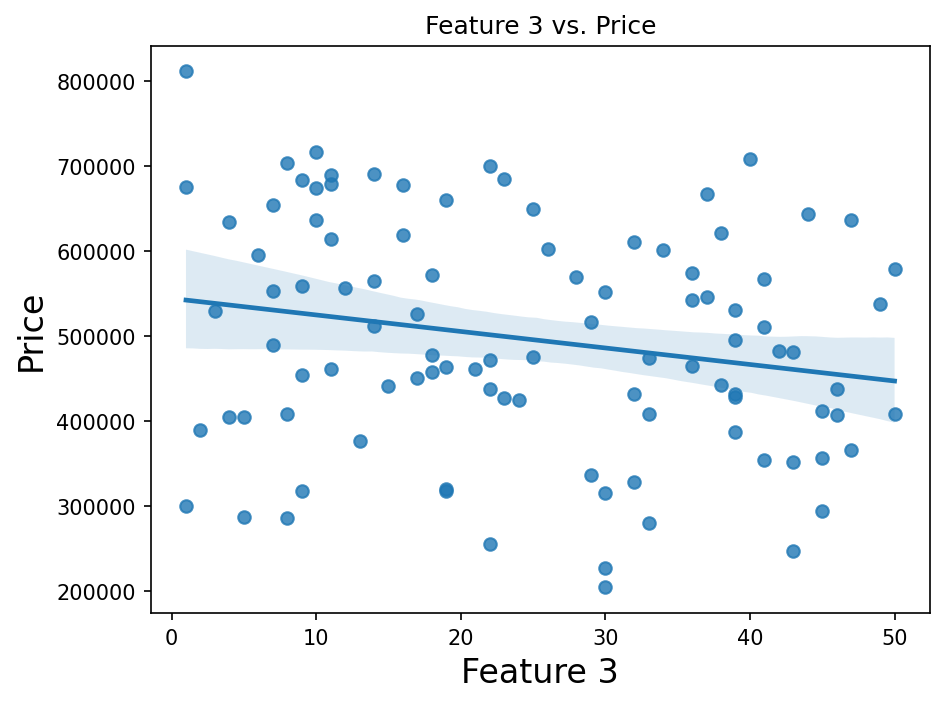

In [207]:
plot = sns.regplot(x=df.f3, y=df.price)
plot.set(title='Feature 3 vs. Price', xlabel='Feature 3', ylabel='Price')
plt.show()

In [224]:
X = df[['bias', 'f1', 'f2', 'f3']].values
y = df.price.values
print(f"X is {X.shape}, y is {y.shape}")

X is (100, 4), y is (100,)


In [225]:
m = y.shape[0]
n = X.shape[1]
print(f"{m:,} samples, {n} features")

100 samples, 4 features


In [226]:
def GetCost(X, y, w):
    # Using MSE (Mean Squared Error) with the 1/2 factor for clean derivatives
    predictions = np.matmul(X,  w)
    errors = predictions - y
    return sum(np.square(errors)) / (2 * len(y))

In [227]:
def GradientDescent(X, y, w, alpha, iterations):
    history = []
    for index in range(iterations):
        # Our predictions are just the product of our samples X times our weight vector
        predictions = np.matmul(X, w)
        # Our errors are the difference between our predictions and our truth values y
        errors = predictions - y
        # The gradient vector is the Jacobian matrix derivative of our cost
        # function with respect to the weights.  This comes out to the transpose
        # of X (n x m) times the errors (m x 1) to get an n x 1 vector that we
        # then scale down by the number of samples m.
        gradient = (1 / len(y)) * np.matmul(X.T, errors)
        # Change the weights by the learning rate alpha times the gradient
        w = w - alpha * gradient
        # Determine the new cost
        cost = GetCost(X, y, w)
        # Keep track of the cost history so we can plot the progress of the algorithm
        history.append(cost)
    # Return the final weights and the cost history
    return w, history

In [228]:
# Execute our algorithm starting with random weights, a learning rate of 0.01, and iterating 1000 times
w, history = GradientDescent(X, y, np.zeros((n)), 0.01, 1000)

C:\Users\jacob\AppData\Local\Temp\ipykernel_81532\4189743102.py:5: RuntimeWarning: overflow encountered in square
  return sum(np.square(errors)) / (2 * len(y))
C:\Users\jacob\AppData\Local\Temp\ipykernel_81532\4189743102.py:5: RuntimeWarning: overflow encountered in scalar add
  return sum(np.square(errors)) / (2 * len(y))
C:\Users\jacob\AppData\Local\Temp\ipykernel_81532\1949191471.py:12: RuntimeWarning: overflow encountered in matmul
  gradient = (1 / len(y)) * np.matmul(X.T, errors)
C:\Users\jacob\AppData\Local\Temp\ipykernel_81532\1949191471.py:14: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradient


In [229]:
print(f"Final weights: {w}")

Final weights: [nan nan nan nan]


In [230]:
history[:10]

[np.float64(2.4144783556996497e+20),
 np.float64(4.473759985543099e+29),
 np.float64(8.28937992388585e+38),
 np.float64(1.535929950300636e+48),
 np.float64(2.845907454950666e+57),
 np.float64(5.273150146306139e+66),
 np.float64(9.770561026894135e+75),
 np.float64(1.8103763430126375e+85),
 np.float64(3.354426111579846e+94),
 np.float64(6.215378687131985e+103)]

In [231]:
# Show a predicted price to see how much we are in the ballbark
print(f"Predicted {np.matmul(X[0], w)}, actual {y[0]}")

Predicted nan, actual 477070.0


In [234]:
def ComputeR2(true, pred):
    result = linregress(true, pred)
    rvalue = result.rvalue
    return rvalue * rvalue

In [235]:
model = LinearRegression(fit_intercept=False, n_jobs=-1)
model.fit(X, y)
print(f"Linear Regression parameters: {model.coef_}")

Linear Regression parameters: [61576.10420189   199.12770185 29565.0833606  -2141.05111551]


In [236]:
pred = model.predict(X)
print(f"Predicted {pred[0]}, actual {y[0]}")

Predicted 458403.0023906398, actual 477070.0


In [239]:
r2 = ComputeR2(y, pred)
print(f"R2 value for LinearRegression model: {r2:.4f}")

R2 value for LinearRegression model: 0.9688
